In [1]:
import casadi as ca
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [2]:
from cycler import cycler

default_cycler = (
    cycler(color=[
        '#0072BD', '#D95319', '#EDB120', '#7E2F8E', '#77AC30',
        '#4DBEEE', '#A2142F', '#FF6F00', '#8DFF33', '#33FFF7',
    ]) +
    cycler('linestyle', [
        '-', '--', '-.', ':', '-',
        '--', '-.', ':', '-', '--'
    ])
)

textsize = 16
labelsize = 18

plt.rc('font', family='serif', serif='Times')
plt.rcParams["text.usetex"] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{amsfonts} \DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}')
plt.rc('xtick', labelsize=textsize)
plt.rc('ytick', labelsize=textsize)
plt.rc('axes', titlesize=labelsize, labelsize=labelsize, prop_cycle=default_cycler)
plt.rc('legend', fontsize=textsize)
plt.rc('grid', linestyle='-.', alpha=0.5)
plt.rc('axes', grid=True)

plt.rcParams['figure.constrained_layout.use'] = True

In [ ]:
a = ca.SX.sym('a', 2, 2)
b = ca.SX.sym('b', 2, 2)

pippo = ca.blockcat([[a, b], [ca.transpose(b), a]])

print(pippo)
print(pippo.shape)

In [ ]:
times = np.array([0.100, 0.297, 0.433, 0.642, 0.767, 1.0])
sum_of_groups = [np.sum(times[i:i+3]) for i in range(0, len(times), 3)]
print(sum_of_groups)

durations = np.diff(times)

durations = np.insert(durations, 0, times[0])

# print(durations)

pippo = [2]
print(pippo[0])

In [ ]:
from scipy.linalg import solve_continuous_are

A = np.array([[-1, 0], [1, 2]])
B = np.array([[1], [1]])

Q = 1000 * np.eye(2)
R = 1

P = solve_continuous_are(A, B, Q, R)

print(P)

### Generate Data

In [ ]:
from examples.example_non_autonomous_linear import test_non_autonomous_switched_linear_comparison

test_non_autonomous_switched_linear_comparison()

### Load Precomputed Data

In [5]:
# Load data from a .mat file
data = scipy.io.loadmat('comparison_results.mat')

# Extract the relevant variables
optimal_costs = data['optimal_costs'][0] 
optimal_constraints = data['optimal_constraints'][0]
iter_array = data['iter_array'][0]  # Extract the array from the nested structure

constraints_value_ss = optimal_constraints[0].flatten()
constraints_value_ms = optimal_constraints[1].flatten()

### Plot Data

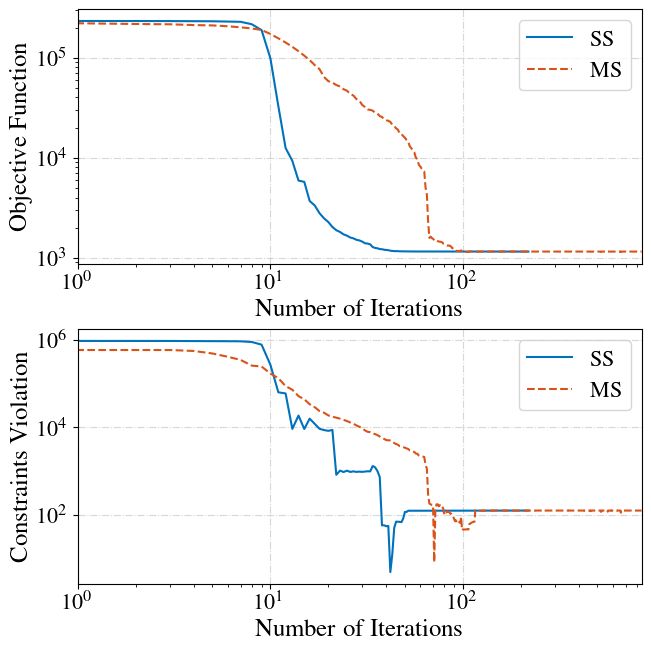

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(6.4, 6.4))

# Plot the optimal costs function value
axs[0].plot(optimal_costs[0].flatten(), label='SS')
axs[0].plot(optimal_costs[1].flatten(), label='MS')
axs[0].set_xlim([1, len(optimal_costs[1])])
axs[0].set_xlabel('Number of Iterations')
axs[0].set_ylabel('Objective Function')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()

# Plot the constraints violation
axs[1].plot(np.abs(constraints_value_ss), label='SS')
axs[1].plot(np.abs(constraints_value_ms), label='MS')
axs[1].set_xlim([1, len(optimal_costs[1])])
axs[1].set_xlabel('Number of Iterations')
axs[1].set_ylabel('Constraints Violation')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()

plt.savefig('obj_constr_vs_iter.pdf', format='pdf', bbox_inches='tight')